In [28]:
import numpy as np
from scipy.sparse import lil_matrix
import matplotlib.pyplot as plt
from labellines import labelLines

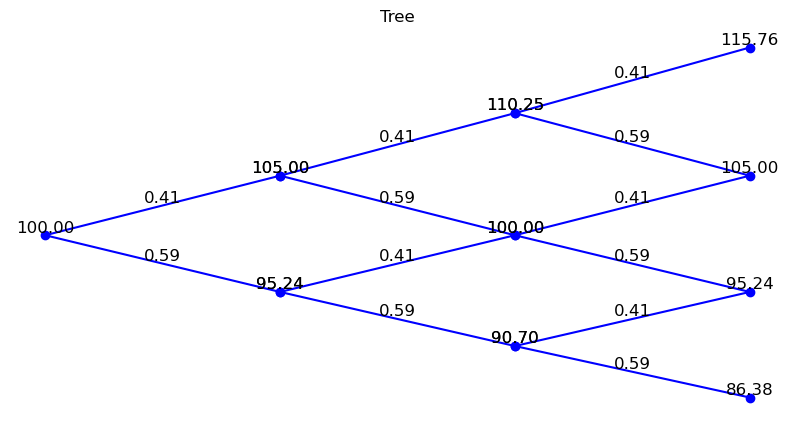

In [62]:
up = 1.05
down = 1/up
spot = 100
interest = 0.04
numPeriods = 3
depth = numPeriods
timeToExpiration = 0.75
strike = 100



p = ((1 + interest*(timeToExpiration/numPeriods)) - down) / (up - down)
def create_level(previousLevel, up, down):
    newLevel = []
    for i in previousLevel:
        newLevel.append(round(i * down, 2))
    newLevel.append(round(previousLevel[-1]*up, 2))
    return newLevel

pricingTree = [[spot]]
count = 1
while count <= depth:
    pricingTree.append(create_level(pricingTree[-1], up, down))
    count = count + 1

mat = lil_matrix((depth+1, depth*2+1), dtype = np.float32)



for i in range(depth+1):
            value = pricingTree[i]
            rows = np.zeros(i+1, dtype=np.int16) + i
            cols = np.arange(i+1)*2+depth-i
            mat[rows, cols] = value

fig = plt.figure(figsize=[10, 5])
plt.axis('off')
plt.title('Tree')

for i in range(depth):
    x = (np.arange(3 + i*2) % 2 == 0) + i
    y = np.arange(0, 2*(i+1)+1) - 1 + (depth-i)
    v = mat[x, y].toarray()[0]
    plt.plot(x, v, 'bo-')
    for i in range(len(x)- 1):
         plt.text((x[i] + x[i+1]) / 2, (v[i] + v[i+1]) / 2, f'{abs(((i % 2) - p)):.2f}', fontsize=12, ha='center', va='bottom')


    for xi, vi in zip(x, v):
        plt.text(xi, vi, f'{vi:.2f}', fontsize=12, ha='center', va='bottom')

In [79]:

call_value_tree = []
def create_call_value_level(previousLevel, p):
    newLevel = []
    for i in range(len(previousLevel) - 1):
        newLevel.append(round(((1-p) * previousLevel[i] + p * previousLevel[i+1]) / (1+(interest*timeToExpiration/numPeriods)), 2))
    return newLevel
currentLevel = [round(max(0, item - strike), 2) for item in pricingTree[-1]]
while(len(currentLevel) > 0):
    call_value_tree.append(currentLevel)
    currentLevel = create_call_value_level(currentLevel,p)
call_value_tree.reverse()

[[5.22], [1.71, 7.75], [0.0, 2.92, 11.24], [0, 0, 5.0, 15.76]]
[[100], [95.24, 105.0], [90.7, 100.0, 110.25], [86.38, 95.24, 105.0, 115.76]]


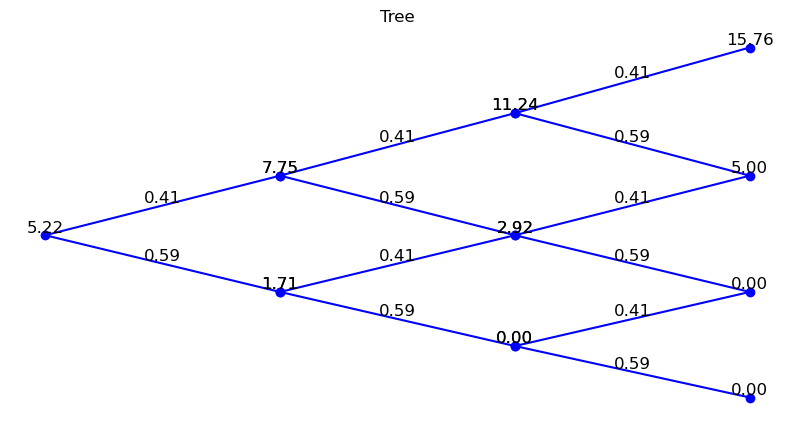

In [83]:
print(call_value_tree)
print(pricingTree)

mat = lil_matrix((depth+1, depth*2+1), dtype = np.float32)
call_mat = lil_matrix((depth+1, depth*2+1), dtype = np.float32)
for i in range(depth+1):
            value = pricingTree[i]
            call_value = call_value_tree[i]
            rows = np.zeros(i+1, dtype=np.int16) + i
            cols = np.arange(i+1)*2+depth-i
            mat[rows, cols] = value
            call_mat[rows, cols] = call_value

fig = plt.figure(figsize=[10, 5])
plt.axis('off')
plt.title('Tree')

for i in range(depth):
    x = (np.arange(3 + i*2) % 2 == 0) + i
    y = np.arange(0, 2*(i+1)+1) - 1 + (depth-i)
    v = mat[x, y].toarray()[0]
    call_v = call_mat[x, y].toarray()[0]
    plt.plot(x, v, 'bo-')
    for i in range(len(x)- 1):
         plt.text((x[i] + x[i+1]) / 2, (v[i] + v[i+1]) / 2, f'{abs(((i % 2) - p)):.2f}', fontsize=12, ha='center', va='bottom')


    for xi, vi, ci in zip(x, v, call_v):
        plt.text(xi, vi, f'{ci:.2f}', fontsize=12, ha='center', va='bottom')